In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv


In [44]:
co_india = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
age = pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")
co_india.columns
age.columns

Index(['Sno', 'AgeGroup', 'TotalCases', 'Percentage'], dtype='object')

In [45]:
co_india['Date'] = pd.to_datetime(co_india['Date'])
co_india['Total Cases'] = co_india['Cured'] + co_india['Deaths'] + co_india['Confirmed']
co_india['active']= co_india['Confirmed'] - co_india['Deaths'] - co_india['Cured']

In [46]:
df1= co_india[co_india['Date']=='20/04/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(title='Total cases till 20th april')
fig.show()

In [47]:
# state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],3)
# state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 3)
state_details = pd.pivot_table(co_india, values=['Total Cases','Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],3)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 3)
state_details = state_details.sort_values(by='Total Cases', ascending= False)
state_details.style.background_gradient(cmap='Greens')


,Confirmed,Cured,Deaths,Total Cases,Recovery Rate,Death Rate
State/UnionTerritory,,,,,,
Maharashtra,4203,507,223,4933,0.121,0.053
Delhi,2003,290,45,2338,0.145,0.022
Gujarat,1851,106,67,2024,0.057,0.036
Tamil Nadu,1477,411,15,1903,0.278,0.01
Madhya Pradesh,1485,127,74,1686,0.086,0.05
Rajasthan,1478,183,14,1675,0.124,0.009
Uttar Pradesh,1176,129,17,1322,0.11,0.014
Telengana,873,190,21,1084,0.218,0.024
Andhra Pradesh,722,92,20,834,0.127,0.028


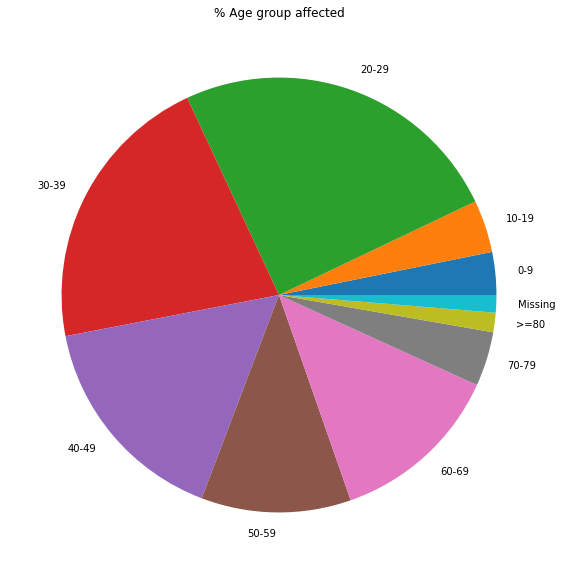

In [48]:
labels = list(age['AgeGroup'])
sizes = list(age['TotalCases'])
# print(labels)
# print(sizes)
    
plt.figure(figsize= (15,10))
plt.title('% Age group affected')
plt.pie(sizes, labels=labels)
plt.show()